In [16]:
import numpy as np
import tec

from matplotlib import pyplot as plt

In [46]:
fig_2_13a_constants = {
    "emitter_temperature": 1800,
    "collector_temperature": 900,
    "collector_barrier": 1.6,
    "collector_position": 1,
}

# emitter_barriers = [2.4, 2.6, 2.8]
emitter_barriers = [2.4,]

collector_voltages = np.linspace(0, 1.6)

fig_2_13a_data = [dict(emitter_barrier=emitter_barrier, collector_voltage=collector_voltage, **fig_2_13a_constants)
                  for emitter_barrier in emitter_barriers for collector_voltage in collector_voltages]

output_current_densities = list(map(lambda x: tec.models.Ideal.from_args(**x).output_current_density(), fig_2_13a_data))

# device = tec.models.Ideal.from_args(
#             emitter_temperature = 1800,
#             emitter_barrier = 2,
#             collector_temperature = 300,
#             collector_barrier = 0.8,
#             collector_voltage = 5,
#             collector_position = 10,
#     )

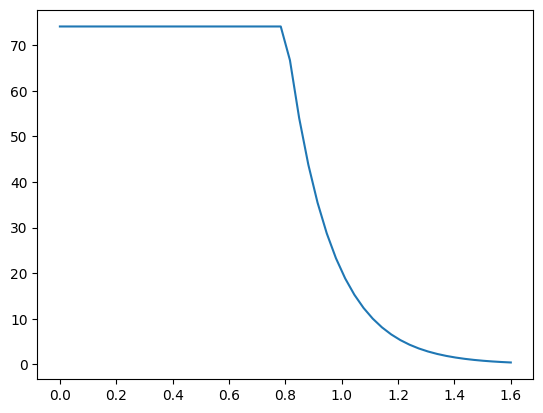

In [47]:
y = np.array(list(map(lambda x: x.value, output_current_densities)))
plt.plot(collector_voltages, y)
plt.show()

Here are the plots from H&G vol. 1 that I'm trying to match.

<img src="assets/fig_2.13a.png" alt="Hatsopolous and Gyftopoulous vol 1, page 54, Fig. 2.13a">

---
DELETE THIS CELL

![alt text](fig_2.13a.png)

<img src="assets/fig_2.13b.png" alt="Hatsopolous and Gyftopoulous vol 1, page 54, Fig. 2.13b">
<img src="assets/fig_2.13c.png" alt="Hatsopolous and Gyftopoulous vol 1, page 55, Fig. 2.13c">
<img src="assets/fig_2.13d.png" alt="Hatsopolous and Gyftopoulous vol 1, page 55, Fig. 2.13d">